In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, accuracy_score

df = pd.read_csv(r"/home/mllab/Downloads/Heart_Disease .csv", na_values = '?')

df.head()



,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbp   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       299 non-null    float64
 12  thal     301 non-null    float64
 13  hd       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [38]:
df.dropna(inplace = True)

In [39]:
df.info()
df_en = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca','thal'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    int64  
 1   sex      297 non-null    int64  
 2   cp       297 non-null    int64  
 3   restbp   297 non-null    int64  
 4   chol     297 non-null    int64  
 5   fbs      297 non-null    int64  
 6   restecg  297 non-null    int64  
 7   thalach  297 non-null    int64  
 8   exang    297 non-null    int64  
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    int64  
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


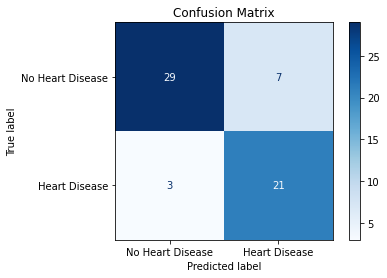

In [40]:
X = df_en.drop('hd', axis=1)
y = df_en['hd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.show()

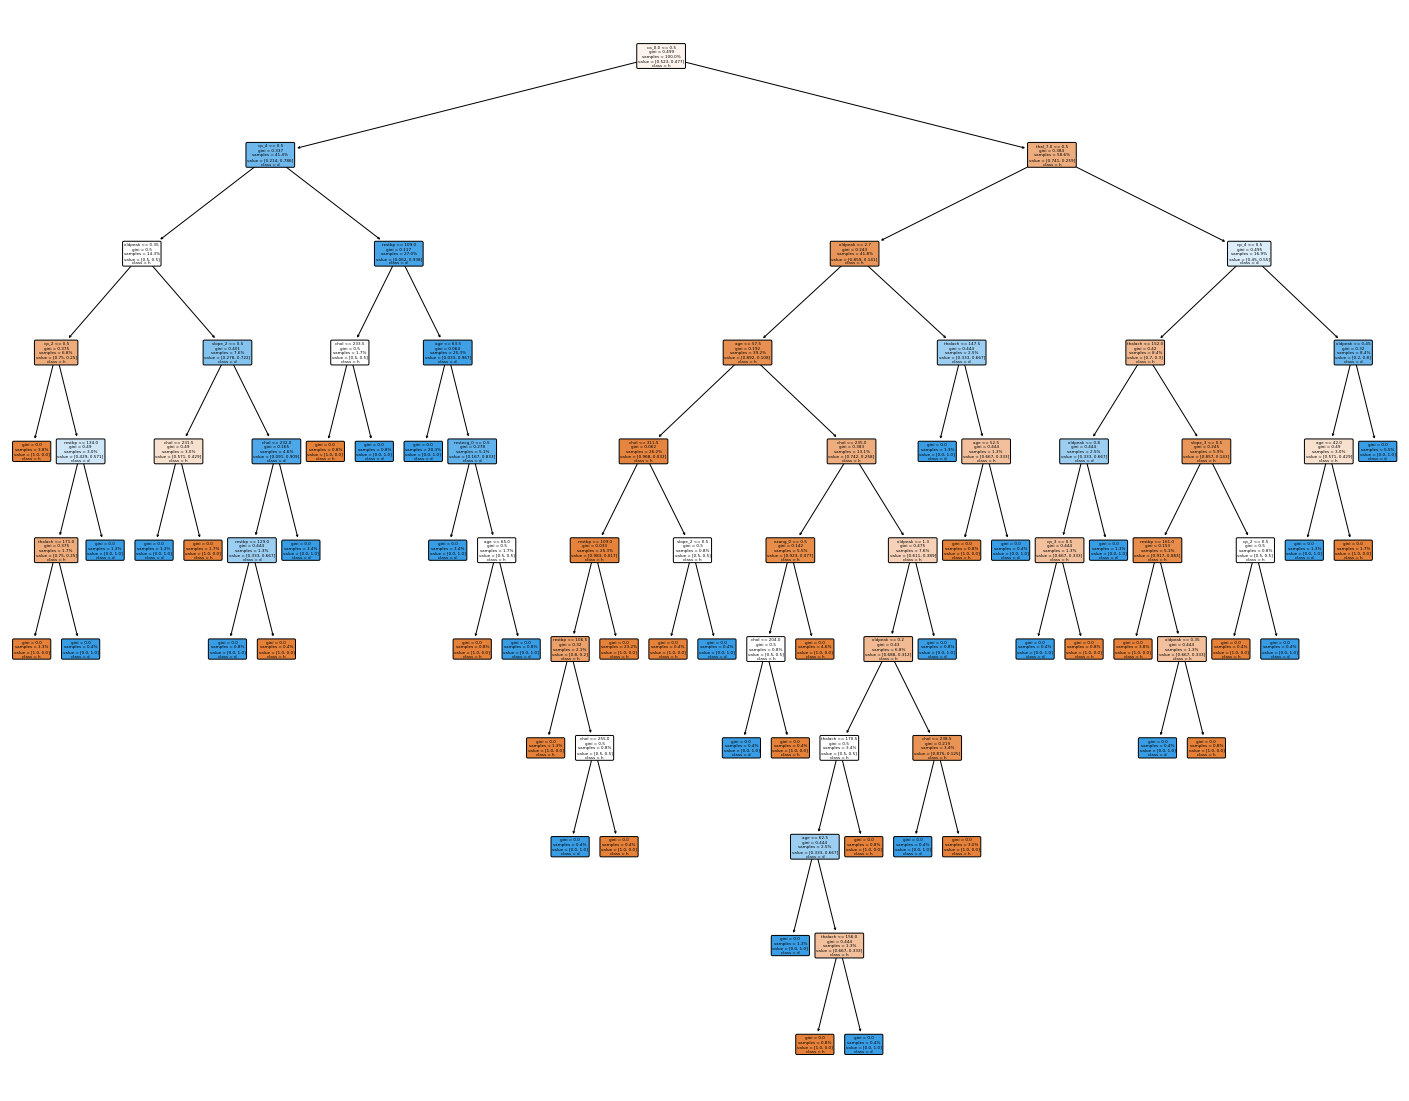

In [41]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names='hd',
                   rounded = True,
                   filled=True,
                   proportion = True)

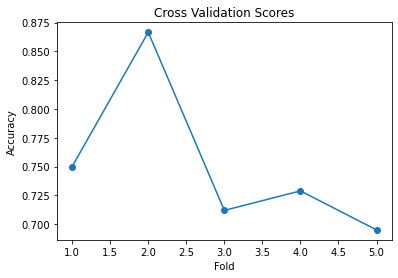

In [42]:
cv_scores = cross_val_score(clf, X, y, cv=5)
plt.plot(range(1,6),cv_scores, marker = 'o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.show()

In [43]:
accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy = {accuracy}")

Accuracy = 0.8333333333333334


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

df = pd.read_csv(r"/home/mllab/Downloads/Heart_Disease .csv", na_values = '?')

df.dropna(inplace = True)

print(df.head())

df.info()

X = df.drop('hd', axis=1)
y = df['hd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   age  sex  cp  restbp  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1     145   233    1        2      150      0      2.3      3   
1   67    1   4     160   286    0        2      108      1      1.5      2   
2   67    1   4     120   229    0        2      129      1      2.6      2   
3   37    1   3     130   250    0        0      187      0      3.5      3   
4   41    0   2     130   204    0        2      172      0      1.4      1   

    ca  thal  hd  
0  0.0   6.0   0  
1  3.0   3.0   1  
2  2.0   7.0   1  
3  0.0   3.0   0  
4  0.0   3.0   0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    int64  
 1   sex      297 non-null    int64  
 2   cp       297 non-null    int64  
 3   restbp   297 non-null    int64  
 4   chol     297 non-null    int64  
 5   fbs      297 non-null    int64  
 6

In [45]:
# 1
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2
feature_importance = rf_model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}:{importance}")



Feature Importance:
age:0.09495745640827613
sex:0.03245951693189368
cp:0.10365331476792469
restbp:0.08975617919773704
chol:0.09772370908920307
fbs:0.013488449040284359
restecg:0.01673694016788303
thalach:0.12859531842697963
exang:0.052209937789763045
oldpeak:0.10365898034599834
slope:0.033970586170053635
ca:0.12831080606616968
thal:0.1044788055978337


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


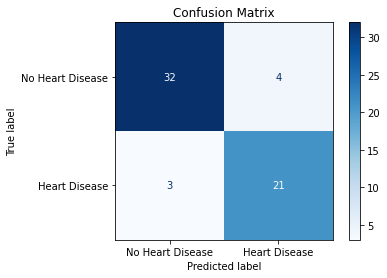

In [46]:
# 3
plot_confusion_matrix(rf_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['No Heart Disease', 'Heart Disease'])
plt.title("Confusion Matrix")
plt.show()

Cross Validation Scores: [0.83333333 0.86666667 0.77966102 0.76271186 0.79661017]


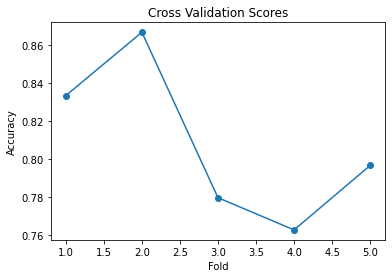

In [47]:
# 4
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
plt.plot(range(1, 6), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.show()


In [51]:
# 5
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 6
param_grid = {
    'n_estimators': [30,50, 100, 150],
    'max_depth': [3,5, 10, 15, None],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 30}


In [49]:
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Accuracy = {accuracy}")

Accuracy = 0.8833333333333333
